# Verileri kendi korelasyonlarına göre tahmin ettirme

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
holidays = pd.read_csv("/kaggle/input/gdz-elektrik-datathon/holidays.csv")
sub = pd.read_csv("/kaggle/input/gdz-elektrik-datathon/sample_submission.csv")
test = pd.read_csv("/kaggle/input/gdz-elektrik-datathon/test.csv")
train = pd.read_csv("/kaggle/input/gdz-elektrik-datathon/train.csv")
weather = pd.read_csv("/kaggle/input/gdz-elektrik-datathon/weather.csv")

In [3]:
weather

,date,lat,lon,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,ilce
0,2021-01-01 00:00:00,38.7996,26.9707,13.8,40.2,0.0,80.0,168.3,6.0,1.0,13.4,izmir-aliaga
1,2021-01-01 01:00:00,38.7996,26.9707,13.5,56.8,0.0,83.0,173.3,5.9,1.0,13.1,izmir-aliaga
2,2021-01-01 02:00:00,38.7996,26.9707,13.3,71.6,0.0,83.9,176.7,5.2,1.0,13.1,izmir-aliaga
3,2021-01-01 03:00:00,38.7996,26.9707,12.9,69.8,0.0,88.3,183.1,5.6,1.0,12.8,izmir-aliaga
4,2021-01-01 04:00:00,38.7996,26.9707,12.6,56.3,0.0,90.0,166.9,6.4,1.0,12.4,izmir-aliaga
...,...,...,...,...,...,...,...,...,...,...,...,...
1314115,2024-03-10 19:00:00,38.6166,27.4196,12.2,0.7,4.1,57.4,50.4,0.9,1.0,12.0,manisa-yunusemre
1314116,2024-03-10 20:00:00,38.6166,27.4196,10.3,1.4,0.0,65.0,234.6,1.0,1.0,10.3,manisa-yunusemre
1314117,2024-03-10 21:00:00,38.6166,27.4196,8.4,2.1,0.0,73.8,234.3,1.2,1.0,8.4,manisa-yunusemre
1314118,2024-03-10 22:00:00,38.6166,27.4196,7.8,1.6,0.0,76.7,230.8,1.1,1.0,7.8,manisa-yunusemre


In [4]:
# Tarih sütununu datetime tipine dönüştürelim
weather['date'] = pd.to_datetime(weather['date'])

# Weather'deki global_rad:W sütunu, bize gün ışığının olduğu saatleri verecek.

In [5]:
dogrulama = weather[weather['ilce'] == "manisa-akhisar"].sort_values(by='date').head(24)
dogrulama

,date,lat,lon,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,ilce
866760,2021-01-01 00:00:00,38.9177,27.8366,10.1,40.5,0.0,84.7,130.8,1.8,1.0,10.2,manisa-akhisar
866761,2021-01-01 01:00:00,38.9177,27.8366,10.1,30.5,0.0,83.2,132.0,1.8,1.0,10.1,manisa-akhisar
866762,2021-01-01 02:00:00,38.9177,27.8366,9.6,39.6,0.0,83.6,136.0,1.8,1.0,8.9,manisa-akhisar
866763,2021-01-01 03:00:00,38.9177,27.8366,9.2,54.2,0.0,84.5,125.7,1.9,1.0,8.4,manisa-akhisar
866764,2021-01-01 04:00:00,38.9177,27.8366,9.7,64.9,0.0,86.2,148.9,1.8,1.0,9.0,manisa-akhisar
866765,2021-01-01 05:00:00,38.9177,27.8366,9.7,74.6,0.0,86.2,164.8,1.6,1.0,9.2,manisa-akhisar
866766,2021-01-01 06:00:00,38.9177,27.8366,10.4,64.9,0.0,84.1,159.2,1.2,1.0,10.4,manisa-akhisar
866767,2021-01-01 07:00:00,38.9177,27.8366,9.5,66.8,0.0,90.0,135.8,1.5,1.0,9.0,manisa-akhisar
866768,2021-01-01 08:00:00,38.9177,27.8366,9.2,70.9,0.0,90.8,129.1,1.7,1.0,8.5,manisa-akhisar
866769,2021-01-01 09:00:00,38.9177,27.8366,10.3,75.0,25.9,85.9,141.2,1.0,1.0,10.6,manisa-akhisar


In [6]:
print(dogrulama["t_2m:C"].sum())
print("gündüz'ün t_2m:C değerleri:", 10.3 + 11.4 + 12.6 + 13.4 + 14 + 14 + 14.9 + 14.5 + 13.8)
print("gece'nin t_2m:C değeri: ",(267.2 - 118.9) / 15)
print("gündüzün t_2m:C değeri: ",118.9 / 9)

267.2
gündüz'ün t_2m:C değerleri: 118.9
gece'nin t_2m:C değeri:  9.886666666666665
gündüzün t_2m:C değeri:  13.211111111111112


> #### global_rad:W değeri doğru. gündüz değeri, 9 satıra bölünmüş hali, yani doğru. gece zaten 0 olacak, o da doğru.
> #### t_2m:C değerini de kontrol ettim, o da doğru her ikisi için de
# kod sorunsuz çalışıyor

In [7]:
weather.columns

Index(['date', 'lat', 'lon', 't_2m:C', 'effective_cloud_cover:p',
       'global_rad:W', 'relative_humidity_2m:p', 'wind_dir_10m:d',
       'wind_speed_10m:ms', 'prob_precip_1h:p', 't_apparent:C', 'ilce'],
      dtype='object')

In [8]:
# 'global_rad:W' sütununa göre gündüz ve gece gruplamalarını yapalım
weather['gece'] = weather['global_rad:W'] == 0
weather['gündüz'] = weather['global_rad:W'] != 0

# Tarih ve ilçe sütunlarına göre gruplayıp, her bir grup için gündüz ve gece verilerinin ortalamasını alalım
grouped = weather.groupby(['date', 'ilce', 'gece', 'gündüz'])
gece_ortalama = grouped.mean().loc[(slice(None), slice(None), True, False), :].reset_index(level=[2, 3], drop=True).add_prefix('gece_')
gündüz_ortalama = grouped.mean().loc[(slice(None), slice(None), False, True), :].reset_index(level=[2, 3], drop=True).add_prefix('gündüz_')

# Her bir gün için sadeleştirilmiş veriyi elde edelim
sadelesmis_df = pd.concat([gece_ortalama, gündüz_ortalama], axis=1).reset_index()

In [9]:
sadelesmis_df[sadelesmis_df['ilce'] == "manisa-akhisar"].sort_values(by='date').head(1)

,date,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_lat,gündüz_lon,gündüz_t_2m:C,gündüz_effective_cloud_cover:p,gündüz_global_rad:W,gündüz_relative_humidity_2m:p,gündüz_wind_dir_10m:d,gündüz_wind_speed_10m:ms,gündüz_prob_precip_1h:p,gündüz_t_apparent:C
31,2021-01-01,manisa-akhisar,38.9177,27.8366,10.1,40.5,0.0,84.7,130.8,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(sadelesmis_df)

1314120

In [11]:
sadelesmis_df = sadelesmis_df.groupby([pd.Grouper(key='date', freq='D'), 'ilce']).mean().reset_index()

In [12]:
sadelesmis_df

,date,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_lat,gündüz_lon,gündüz_t_2m:C,gündüz_effective_cloud_cover:p,gündüz_global_rad:W,gündüz_relative_humidity_2m:p,gündüz_wind_dir_10m:d,gündüz_wind_speed_10m:ms,gündüz_prob_precip_1h:p,gündüz_t_apparent:C
0,2021-01-01,izmir-aliaga,38.7996,26.9707,12.620000,55.073333,0.0,88.206667,160.320000,4.273333,...,38.7996,26.9707,14.366667,55.000000,194.722222,82.300000,178.677778,4.255556,1.000000,16.155556
1,2021-01-01,izmir-balcova,38.3891,27.0500,12.573333,55.540000,0.0,89.813333,144.426667,3.446667,...,38.3891,27.0500,13.944444,68.633333,175.966667,85.422222,146.933333,3.000000,1.766667,15.822222
2,2021-01-01,izmir-bayindir,38.2178,27.6478,10.346667,56.373333,0.0,90.093333,47.026667,1.886667,...,38.2178,27.6478,12.977778,82.044444,168.811111,87.833333,77.577778,1.300000,1.000000,15.177778
3,2021-01-01,izmir-bayrakli,38.4612,27.1881,12.153333,53.340000,0.0,90.553333,136.460000,2.473333,...,38.4612,27.1881,13.722222,66.444444,177.188889,86.977778,150.588889,2.933333,1.577778,15.700000
4,2021-01-01,izmir-bergama,39.1214,27.1799,10.846667,61.113333,0.0,89.700000,164.506667,1.393333,...,39.1214,27.1799,13.500000,66.155556,171.888889,83.255556,222.933333,2.200000,1.000000,15.355556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54750,2024-03-10,manisa-sehzadeler,38.6140,27.4296,6.075000,1.025000,0.0,81.400000,162.658333,0.925000,...,38.6140,27.4296,10.566667,18.283333,398.883333,64.125000,64.616667,0.866667,1.000000,14.233333
54751,2024-03-10,manisa-selendi,38.7450,28.8693,2.923077,10.284615,0.0,85.046154,116.784615,1.261538,...,38.7450,28.8693,8.318182,41.327273,474.190909,61.781818,228.027273,1.809091,1.000000,12.672727
54752,2024-03-10,manisa-soma,39.1881,27.6100,3.841667,26.025000,0.0,90.216667,63.700000,1.016667,...,39.1881,27.6100,9.875000,46.683333,394.233333,61.300000,186.925000,0.908333,1.000000,13.266667
54753,2024-03-10,manisa-turgutlu,38.5002,27.7084,6.158333,0.408333,0.0,68.266667,197.833333,1.200000,...,38.5002,27.7084,10.425000,38.275000,392.875000,57.491667,195.358333,0.583333,1.000000,14.141667


In [13]:
sadelesmis_df.isna().sum()

date                              0
ilce                              0
gece_lat                          0
gece_lon                          0
gece_t_2m:C                       0
gece_effective_cloud_cover:p      0
gece_global_rad:W                 0
gece_relative_humidity_2m:p       0
gece_wind_dir_10m:d               0
gece_wind_speed_10m:ms            0
gece_prob_precip_1h:p             0
gece_t_apparent:C                 0
gündüz_lat                        0
gündüz_lon                        0
gündüz_t_2m:C                     0
gündüz_effective_cloud_cover:p    0
gündüz_global_rad:W               0
gündüz_relative_humidity_2m:p     0
gündüz_wind_dir_10m:d             0
gündüz_wind_speed_10m:ms          0
gündüz_prob_precip_1h:p           0
gündüz_t_apparent:C               0
dtype: int64

# Tüm günleri ekleyelim bence, haftaiçi veya sonu olarak değil. Ya da ikisini de ekleyelim?

In [14]:
# Hafta içi ve hafta sonu sütunlarını ekleyelim
sadelesmis_df['hafta_ici'] = (sadelesmis_df['date'].dt.dayofweek < 5).astype(int)
sadelesmis_df['hafta_sonu'] = (sadelesmis_df['date'].dt.dayofweek >= 5).astype(int)

In [15]:
günler = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for gün in günler:
    sadelesmis_df[gün] = (sadelesmis_df['date'].dt.strftime('%A') == gün).astype(int)

##### cuma-cumartesi-pazar günleri 1 tane fazla diğer günlerden. Ek bilgi. Bir işe yarar mı bilmem

In [16]:
sadelesmis_df

,date,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2021-01-01,izmir-aliaga,38.7996,26.9707,12.620000,55.073333,0.0,88.206667,160.320000,4.273333,...,16.155556,1,0,0,0,0,0,1,0,0
1,2021-01-01,izmir-balcova,38.3891,27.0500,12.573333,55.540000,0.0,89.813333,144.426667,3.446667,...,15.822222,1,0,0,0,0,0,1,0,0
2,2021-01-01,izmir-bayindir,38.2178,27.6478,10.346667,56.373333,0.0,90.093333,47.026667,1.886667,...,15.177778,1,0,0,0,0,0,1,0,0
3,2021-01-01,izmir-bayrakli,38.4612,27.1881,12.153333,53.340000,0.0,90.553333,136.460000,2.473333,...,15.700000,1,0,0,0,0,0,1,0,0
4,2021-01-01,izmir-bergama,39.1214,27.1799,10.846667,61.113333,0.0,89.700000,164.506667,1.393333,...,15.355556,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54750,2024-03-10,manisa-sehzadeler,38.6140,27.4296,6.075000,1.025000,0.0,81.400000,162.658333,0.925000,...,14.233333,0,1,0,0,0,0,0,0,1
54751,2024-03-10,manisa-selendi,38.7450,28.8693,2.923077,10.284615,0.0,85.046154,116.784615,1.261538,...,12.672727,0,1,0,0,0,0,0,0,1
54752,2024-03-10,manisa-soma,39.1881,27.6100,3.841667,26.025000,0.0,90.216667,63.700000,1.016667,...,13.266667,0,1,0,0,0,0,0,0,1
54753,2024-03-10,manisa-turgutlu,38.5002,27.7084,6.158333,0.408333,0.0,68.266667,197.833333,1.200000,...,14.141667,0,1,0,0,0,0,0,0,1


# Denemeyi bu sütunlar arasında yaptım

In [17]:
#sadelesmis_df = weather.groupby([pd.Grouper(key='date', freq='D'), 'ilce']).mean().reset_index()

In [18]:
#sadelesmis_df

In [19]:
sadelesmis_df[sadelesmis_df['ilce'] == "manisa-akhisar"].sort_values(by='date')

,date,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
31,2021-01-01,manisa-akhisar,38.9177,27.8366,9.886667,51.960000,0.0,88.493333,104.100000,1.413333,...,15.500000,1,0,0,0,0,0,1,0,0
78,2021-01-02,manisa-akhisar,38.9177,27.8366,7.893333,22.160000,0.0,91.760000,75.280000,1.300000,...,16.211111,0,1,0,0,0,0,0,1,0
125,2021-01-03,manisa-akhisar,38.9177,27.8366,6.493333,21.773333,0.0,88.193333,77.833333,1.173333,...,12.833333,0,1,0,0,0,0,0,0,1
172,2021-01-04,manisa-akhisar,38.9177,27.8366,8.140000,38.673333,0.0,79.440000,81.686667,1.693333,...,15.455556,1,0,1,0,0,0,0,0,0
219,2021-01-05,manisa-akhisar,38.9177,27.8366,10.800000,46.360000,0.0,78.120000,135.766667,1.813333,...,15.855556,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54551,2024-03-06,manisa-akhisar,38.9177,27.8366,7.546154,30.076923,0.0,89.061538,38.938462,1.438462,...,15.072727,1,0,0,0,1,0,0,0,0
54598,2024-03-07,manisa-akhisar,38.9177,27.8366,5.891667,24.225000,0.0,88.616667,41.633333,1.066667,...,15.083333,1,0,0,0,0,1,0,0,0
54645,2024-03-08,manisa-akhisar,38.9177,27.8366,8.058333,56.366667,0.0,84.950000,42.675000,2.033333,...,13.333333,1,0,0,0,0,0,1,0,0
54692,2024-03-09,manisa-akhisar,38.9177,27.8366,6.233333,22.308333,0.0,80.066667,152.041667,3.133333,...,13.233333,0,1,0,0,0,0,0,1,0


In [20]:
1314120 / 24

54755.0

In [21]:
deneme = sadelesmis_df.loc[sadelesmis_df['ilce'] == 'manisa-akhisar']
deneme1 = deneme.loc[(deneme['date'] >= "2021-01-01 00:00:00") & (deneme['date'] <= "2021-01-01 23:00:00")]

In [22]:
deneme1

,date,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
31,2021-01-01,manisa-akhisar,38.9177,27.8366,9.886667,51.96,0.0,88.493333,104.1,1.413333,...,15.5,1,0,0,0,0,0,1,0,0


In [23]:
deneme2 = weather.loc[weather['ilce'] == 'manisa-akhisar']

In [24]:
deneme2

,date,lat,lon,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,ilce,gece,gündüz
866760,2021-01-01 00:00:00,38.9177,27.8366,10.1,40.5,0.0,84.7,130.8,1.8,1.0,10.2,manisa-akhisar,True,False
866761,2021-01-01 01:00:00,38.9177,27.8366,10.1,30.5,0.0,83.2,132.0,1.8,1.0,10.1,manisa-akhisar,True,False
866762,2021-01-01 02:00:00,38.9177,27.8366,9.6,39.6,0.0,83.6,136.0,1.8,1.0,8.9,manisa-akhisar,True,False
866763,2021-01-01 03:00:00,38.9177,27.8366,9.2,54.2,0.0,84.5,125.7,1.9,1.0,8.4,manisa-akhisar,True,False
866764,2021-01-01 04:00:00,38.9177,27.8366,9.7,64.9,0.0,86.2,148.9,1.8,1.0,9.0,manisa-akhisar,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894715,2024-03-10 19:00:00,38.9177,27.8366,11.4,3.2,3.0,56.7,221.0,1.2,1.0,11.3,manisa-akhisar,False,True
894716,2024-03-10 20:00:00,38.9177,27.8366,9.8,6.5,0.0,61.4,70.5,1.1,1.0,9.8,manisa-akhisar,True,False
894717,2024-03-10 21:00:00,38.9177,27.8366,8.1,9.7,0.0,66.6,54.0,1.0,1.0,8.1,manisa-akhisar,True,False
894718,2024-03-10 22:00:00,38.9177,27.8366,7.0,7.4,0.0,71.1,55.4,0.9,1.0,7.0,manisa-akhisar,True,False


In [25]:
deneme3 = deneme2.loc[(deneme2['date'] >= "2021-01-01 00:00:00") & (deneme2['date'] <= "2021-01-01 23:00:00")]

In [26]:
deneme3

,date,lat,lon,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,ilce,gece,gündüz
866760,2021-01-01 00:00:00,38.9177,27.8366,10.1,40.5,0.0,84.7,130.8,1.8,1.0,10.2,manisa-akhisar,True,False
866761,2021-01-01 01:00:00,38.9177,27.8366,10.1,30.5,0.0,83.2,132.0,1.8,1.0,10.1,manisa-akhisar,True,False
866762,2021-01-01 02:00:00,38.9177,27.8366,9.6,39.6,0.0,83.6,136.0,1.8,1.0,8.9,manisa-akhisar,True,False
866763,2021-01-01 03:00:00,38.9177,27.8366,9.2,54.2,0.0,84.5,125.7,1.9,1.0,8.4,manisa-akhisar,True,False
866764,2021-01-01 04:00:00,38.9177,27.8366,9.7,64.9,0.0,86.2,148.9,1.8,1.0,9.0,manisa-akhisar,True,False
866765,2021-01-01 05:00:00,38.9177,27.8366,9.7,74.6,0.0,86.2,164.8,1.6,1.0,9.2,manisa-akhisar,True,False
866766,2021-01-01 06:00:00,38.9177,27.8366,10.4,64.9,0.0,84.1,159.2,1.2,1.0,10.4,manisa-akhisar,True,False
866767,2021-01-01 07:00:00,38.9177,27.8366,9.5,66.8,0.0,90.0,135.8,1.5,1.0,9.0,manisa-akhisar,True,False
866768,2021-01-01 08:00:00,38.9177,27.8366,9.2,70.9,0.0,90.8,129.1,1.7,1.0,8.5,manisa-akhisar,True,False
866769,2021-01-01 09:00:00,38.9177,27.8366,10.3,75.0,25.9,85.9,141.2,1.0,1.0,10.6,manisa-akhisar,False,True


In [27]:
deneme3['t_2m:C'].max()

14.9

In [28]:
# 'ilce' ve 'tarih' sütunlarını oluşturarak eksik satırları doldurmak için kullanacağımız bir DataFrame oluşturalım
ilceler = train['ilce'].unique()
tarihler = pd.date_range(start='2021-01-01', end='2024-01-31', freq='D')
takvim = pd.DataFrame([(ilce, tarih) for ilce in ilceler for tarih in tarihler], columns=['ilce', 'tarih'])

# 'takvim' DataFrame'ini 'train' DataFrame'ine ekleyelim ve eksik olan satırları dolduralım
train['tarih'] = pd.to_datetime(train['tarih'])  # 'train' DataFrame'indeki 'tarih' sütununu datetime64[ns] veri türüne dönüştürme
takvim['tarih'] = pd.to_datetime(takvim['tarih'])  # 'takvim' DataFrame'indeki 'tarih' sütununu datetime64[ns] veri türüne dönüştürme
train = pd.merge(takvim, train, on=['ilce', 'tarih'], how='left')

# Eksik olan satırları dolduralım
train['bildirimsiz_sum'].fillna(0, inplace=True)
train['bildirimli_sum'].fillna(0, inplace=True)

/tmp/ipykernel_18/2913220153.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['bildirimsiz_sum'].fillna(0, inplace=True)
/tmp/ipykernel_18/2913220153.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [29]:
sadelesmis_df = sadelesmis_df.rename(columns={'date': 'tarih'})

In [30]:
sadelesmis_df

,tarih,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2021-01-01,izmir-aliaga,38.7996,26.9707,12.620000,55.073333,0.0,88.206667,160.320000,4.273333,...,16.155556,1,0,0,0,0,0,1,0,0
1,2021-01-01,izmir-balcova,38.3891,27.0500,12.573333,55.540000,0.0,89.813333,144.426667,3.446667,...,15.822222,1,0,0,0,0,0,1,0,0
2,2021-01-01,izmir-bayindir,38.2178,27.6478,10.346667,56.373333,0.0,90.093333,47.026667,1.886667,...,15.177778,1,0,0,0,0,0,1,0,0
3,2021-01-01,izmir-bayrakli,38.4612,27.1881,12.153333,53.340000,0.0,90.553333,136.460000,2.473333,...,15.700000,1,0,0,0,0,0,1,0,0
4,2021-01-01,izmir-bergama,39.1214,27.1799,10.846667,61.113333,0.0,89.700000,164.506667,1.393333,...,15.355556,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54750,2024-03-10,manisa-sehzadeler,38.6140,27.4296,6.075000,1.025000,0.0,81.400000,162.658333,0.925000,...,14.233333,0,1,0,0,0,0,0,0,1
54751,2024-03-10,manisa-selendi,38.7450,28.8693,2.923077,10.284615,0.0,85.046154,116.784615,1.261538,...,12.672727,0,1,0,0,0,0,0,0,1
54752,2024-03-10,manisa-soma,39.1881,27.6100,3.841667,26.025000,0.0,90.216667,63.700000,1.016667,...,13.266667,0,1,0,0,0,0,0,0,1
54753,2024-03-10,manisa-turgutlu,38.5002,27.7084,6.158333,0.408333,0.0,68.266667,197.833333,1.200000,...,14.141667,0,1,0,0,0,0,0,0,1


In [31]:
train['tarih'] = pd.to_datetime(train['tarih'])
sadelesmis_df['tarih'] = pd.to_datetime(sadelesmis_df['tarih'])

In [32]:
# 'city' sütunu üzerinden birleştirme yapalım
merged_df = pd.merge(train, sadelesmis_df, on=['tarih','ilce'], how='left')

In [33]:
merged_df

,ilce,tarih,bildirimsiz_sum,bildirimli_sum,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,manisa-akhisar,2021-01-01,9.0,0.0,38.9177,27.8366,9.886667,51.960000,0.0,88.493333,...,15.500000,1,0,0,0,0,0,1,0,0
1,manisa-akhisar,2021-01-02,10.0,0.0,38.9177,27.8366,7.893333,22.160000,0.0,91.760000,...,16.211111,0,1,0,0,0,0,0,1,0
2,manisa-akhisar,2021-01-03,5.0,2.0,38.9177,27.8366,6.493333,21.773333,0.0,88.193333,...,12.833333,0,1,0,0,0,0,0,0,1
3,manisa-akhisar,2021-01-04,6.0,0.0,38.9177,27.8366,8.140000,38.673333,0.0,79.440000,...,15.455556,1,0,1,0,0,0,0,0,0
4,manisa-akhisar,2021-01-05,15.0,4.0,38.9177,27.8366,10.800000,46.360000,0.0,78.120000,...,15.855556,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,izmir-selcuk,2024-01-27,0.0,0.0,37.9508,27.3700,5.392857,34.685714,0.0,84.142857,...,12.890000,0,1,0,0,0,0,0,1,0
52918,izmir-selcuk,2024-01-28,0.0,0.0,37.9508,27.3700,5.364286,20.392857,0.0,79.535714,...,11.830000,0,1,0,0,0,0,0,0,1
52919,izmir-selcuk,2024-01-29,0.0,0.0,37.9508,27.3700,3.971429,41.014286,0.0,75.442857,...,7.430000,1,0,1,0,0,0,0,0,0
52920,izmir-selcuk,2024-01-30,0.0,0.0,37.9508,27.3700,4.578571,43.650000,0.0,67.757143,...,6.380000,1,0,0,1,0,0,0,0,0


# ekleme

In [34]:
"""# Histogram çizimi
plt.figure(figsize=(8, 6))
plt.hist(merged_df['gece_wind_speed_10m:ms'], bins=5, color='skyblue', edgecolor='black')  # bins parametresiyle çubuk sayısını ayarlayabilirsiniz
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()"""

"# Histogram çizimi\nplt.figure(figsize=(8, 6))\nplt.hist(merged_df['gece_wind_speed_10m:ms'], bins=5, color='skyblue', edgecolor='black')  # bins parametresiyle çubuk sayısını ayarlayabilirsiniz\nplt.title('Histogram of Values')\nplt.xlabel('Value')\nplt.ylabel('Frequency')\nplt.grid(True)\nplt.show()"

In [35]:
"""from scipy import stats

# Normallik dağılımına uymayan sütunları tespit etmek için Shapiro-Wilk testini kullanalım
non_normal_sutunlar = []
for column in merged_df.columns.difference(['ilce', 'tarih']):
    _, p_value = stats.shapiro(merged_df[column])  # p-value için endeks 0'a değiştirildi
    if p_value < 0.05:  # Anlamlılık düzeyi olarak genellikle 0.05 kullanılır
        non_normal_sutunlar.append(column)

print("Normallik dağılımına uymayan sütunlar:", non_normal_sutunlar)

# Box-Cox dönüşümü ile normallik dağılımına dönüştürelim
for column in non_normal_sutunlar:
    merged_df[column], _ = stats.boxcox(merged_df[column] + 1)  # Hatanın çözümü burada, 1 ekleyerek negatif değerlerden kurtuluyoruz

# Dönüştürülmüş DataFrame'i yazdıralım
print("Box-Cox dönüşümü uygulanmış DataFrame:")
print(merged_df)"""

'from scipy import stats\n\n# Normallik dağılımına uymayan sütunları tespit etmek için Shapiro-Wilk testini kullanalım\nnon_normal_sutunlar = []\nfor column in merged_df.columns.difference([\'ilce\', \'tarih\']):\n    _, p_value = stats.shapiro(merged_df[column])  # p-value için endeks 0\'a değiştirildi\n    if p_value < 0.05:  # Anlamlılık düzeyi olarak genellikle 0.05 kullanılır\n        non_normal_sutunlar.append(column)\n\nprint("Normallik dağılımına uymayan sütunlar:", non_normal_sutunlar)\n\n# Box-Cox dönüşümü ile normallik dağılımına dönüştürelim\nfor column in non_normal_sutunlar:\n    merged_df[column], _ = stats.boxcox(merged_df[column] + 1)  # Hatanın çözümü burada, 1 ekleyerek negatif değerlerden kurtuluyoruz\n\n# Dönüştürülmüş DataFrame\'i yazdıralım\nprint("Box-Cox dönüşümü uygulanmış DataFrame:")\nprint(merged_df)'

In [36]:
"""# Negatif değer içeren sütunları depolamak için bir liste oluşturalım
sütunlar_negatif_değerler = []

# DataFrame'deki tüm sütunları kontrol edelim
for sütun in merged_df.columns:
    # Sütunun tüm değerlerinin sayısal olup olmadığını kontrol edelim
    if pd.api.types.is_numeric_dtype(merged_df[sütun]):
        # Her bir sütunda negatif değer içeren satırları filtreleyelim
        negatif_değer_satırları = merged_df[merged_df[sütun] < 0]
        
        # Eğer bu sütunda negatif değer içeren bir satır varsa, sütun adını listeye ekleyelim
        if not negatif_değer_satırları.empty:
            sütunlar_negatif_değerler.append(sütun)

# Negatif değer içeren sütunları yazdıralım
print("Negatif değer içeren sütunlar:", sütunlar_negatif_değerler)
"""

'# Negatif değer içeren sütunları depolamak için bir liste oluşturalım\nsütunlar_negatif_değerler = []\n\n# DataFrame\'deki tüm sütunları kontrol edelim\nfor sütun in merged_df.columns:\n    # Sütunun tüm değerlerinin sayısal olup olmadığını kontrol edelim\n    if pd.api.types.is_numeric_dtype(merged_df[sütun]):\n        # Her bir sütunda negatif değer içeren satırları filtreleyelim\n        negatif_değer_satırları = merged_df[merged_df[sütun] < 0]\n        \n        # Eğer bu sütunda negatif değer içeren bir satır varsa, sütun adını listeye ekleyelim\n        if not negatif_değer_satırları.empty:\n            sütunlar_negatif_değerler.append(sütun)\n\n# Negatif değer içeren sütunları yazdıralım\nprint("Negatif değer içeren sütunlar:", sütunlar_negatif_değerler)\n'

# ekleme bitti

# koreleyşın

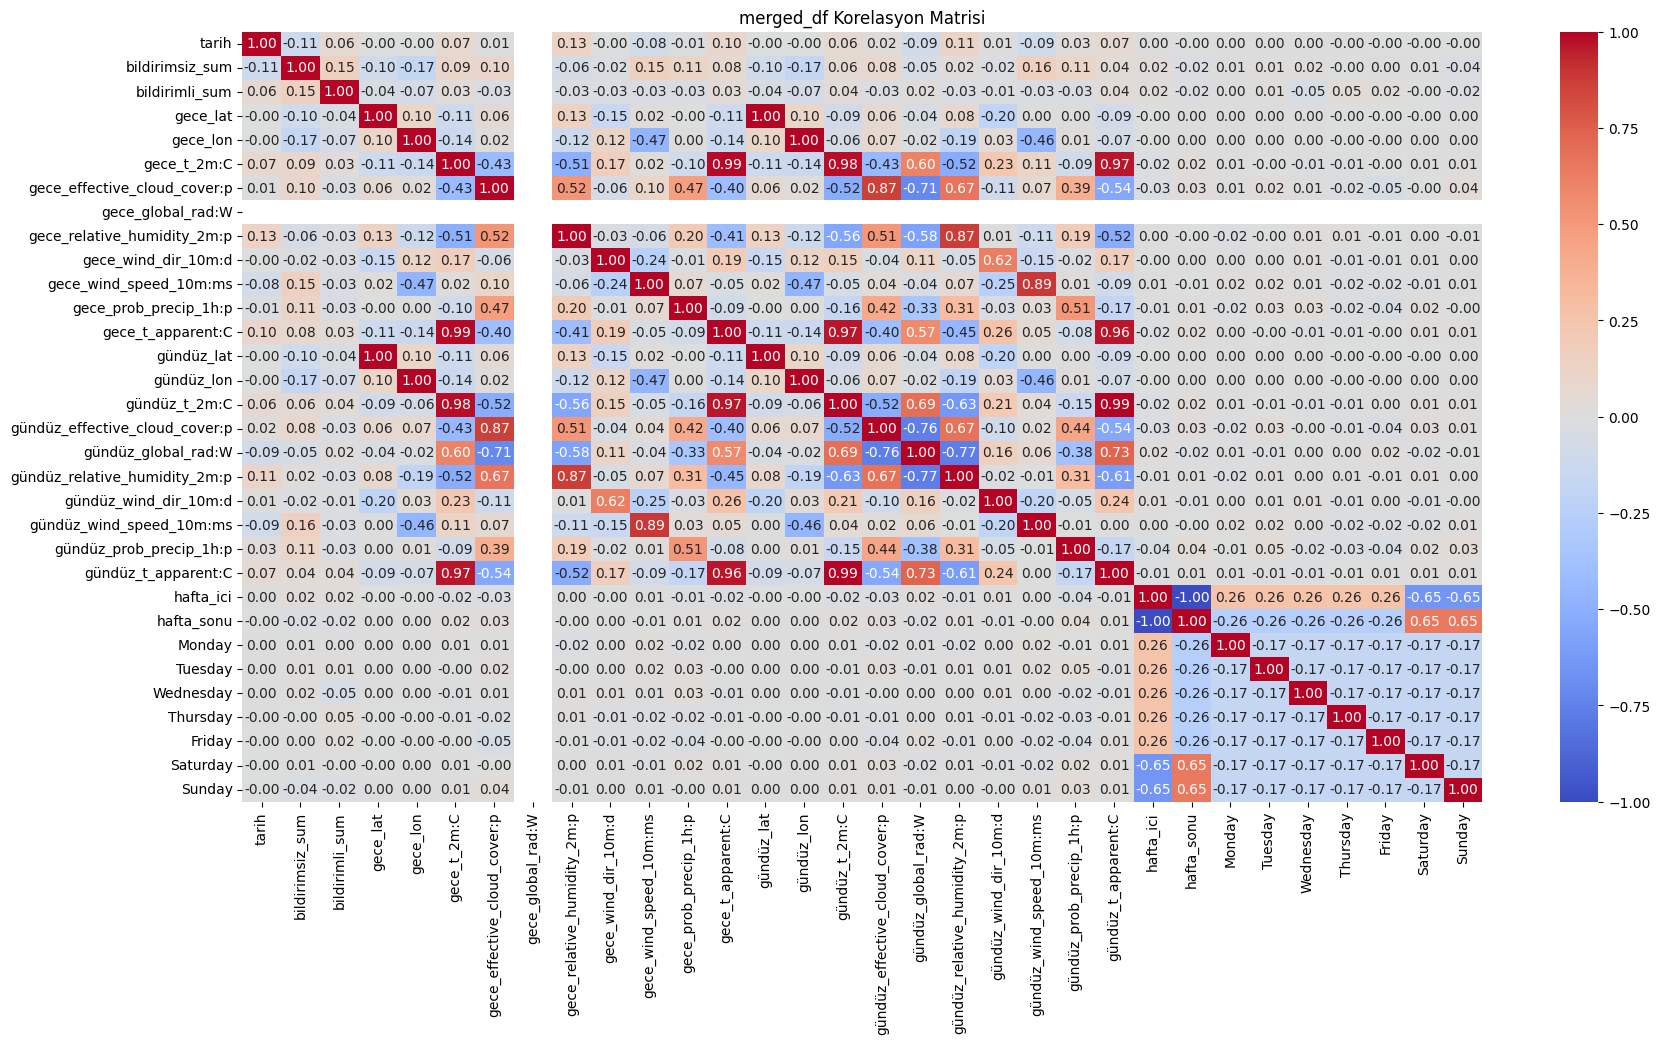

In [37]:
degrem = merged_df.drop(columns=['ilce'])

degremk = degrem.corr()
# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(20,10))
sns.heatmap(degremk, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('merged_df Korelasyon Matrisi')
plt.show()

#### tarih farkı sebebi: weather.csv dosyasındaki veriler 2024-03-10'a kadar gidiyorken, train.csv'de 2024-01-31'de son buluyor.

In [38]:
print("47 ilçe x 39 günlük fark: ",47 * 39)
print("54755 - 52922: ", 54755 - 52922)
print("Yani sonuç aynı")

47 ilçe x 39 günlük fark:  1833
54755 - 52922:  1833
Yani sonuç aynı


In [39]:
merged_df

,ilce,tarih,bildirimsiz_sum,bildirimli_sum,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,manisa-akhisar,2021-01-01,9.0,0.0,38.9177,27.8366,9.886667,51.960000,0.0,88.493333,...,15.500000,1,0,0,0,0,0,1,0,0
1,manisa-akhisar,2021-01-02,10.0,0.0,38.9177,27.8366,7.893333,22.160000,0.0,91.760000,...,16.211111,0,1,0,0,0,0,0,1,0
2,manisa-akhisar,2021-01-03,5.0,2.0,38.9177,27.8366,6.493333,21.773333,0.0,88.193333,...,12.833333,0,1,0,0,0,0,0,0,1
3,manisa-akhisar,2021-01-04,6.0,0.0,38.9177,27.8366,8.140000,38.673333,0.0,79.440000,...,15.455556,1,0,1,0,0,0,0,0,0
4,manisa-akhisar,2021-01-05,15.0,4.0,38.9177,27.8366,10.800000,46.360000,0.0,78.120000,...,15.855556,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,izmir-selcuk,2024-01-27,0.0,0.0,37.9508,27.3700,5.392857,34.685714,0.0,84.142857,...,12.890000,0,1,0,0,0,0,0,1,0
52918,izmir-selcuk,2024-01-28,0.0,0.0,37.9508,27.3700,5.364286,20.392857,0.0,79.535714,...,11.830000,0,1,0,0,0,0,0,0,1
52919,izmir-selcuk,2024-01-29,0.0,0.0,37.9508,27.3700,3.971429,41.014286,0.0,75.442857,...,7.430000,1,0,1,0,0,0,0,0,0
52920,izmir-selcuk,2024-01-30,0.0,0.0,37.9508,27.3700,4.578571,43.650000,0.0,67.757143,...,6.380000,1,0,0,1,0,0,0,0,0


In [40]:
"""start_date = '2023-11-03'
end_date = '2024-01-31'
countries = {}
for ilce in merged_df['ilce'].unique():
    ilce_filtre = (merged_df['ilce'] == ilce) & (merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)
    countries[ilce] = ilce_filtre
merged_df = pd.concat([merged_df[ilce_filtre] for ilce, ilce_filtre in countries.items()])"""

"start_date = '2023-11-03'\nend_date = '2024-01-31'\ncountries = {}\nfor ilce in merged_df['ilce'].unique():\n    ilce_filtre = (merged_df['ilce'] == ilce) & (merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)\n    countries[ilce] = ilce_filtre\nmerged_df = pd.concat([merged_df[ilce_filtre] for ilce, ilce_filtre in countries.items()])"

# Verileri son 1 yıl olarak filtreleyelim.

In [41]:
# İstenen tarih aralığı
start_date = '2023-01-01'
end_date = '2024-01-31'

# Tarih aralığına göre veri setini filtreleme
merged_df = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

In [42]:
merged_df

,ilce,tarih,bildirimsiz_sum,bildirimli_sum,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
730,manisa-akhisar,2023-01-01,0.0,3.0,38.9177,27.8366,4.693333,1.320000,0.0,89.620000,...,13.222222,0,1,0,0,0,0,0,0,1
731,manisa-akhisar,2023-01-02,4.0,1.0,38.9177,27.8366,3.753333,0.986667,0.0,80.320000,...,11.933333,1,0,1,0,0,0,0,0,0
732,manisa-akhisar,2023-01-03,4.0,1.0,38.9177,27.8366,2.020000,0.000000,0.0,73.860000,...,10.588889,1,0,0,1,0,0,0,0,0
733,manisa-akhisar,2023-01-04,3.0,1.0,38.9177,27.8366,1.886667,17.560000,0.0,74.766667,...,10.355556,1,0,0,0,1,0,0,0,0
734,manisa-akhisar,2023-01-05,9.0,1.0,38.9177,27.8366,3.520000,22.433333,0.0,90.826667,...,11.000000,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,izmir-selcuk,2024-01-27,0.0,0.0,37.9508,27.3700,5.392857,34.685714,0.0,84.142857,...,12.890000,0,1,0,0,0,0,0,1,0
52918,izmir-selcuk,2024-01-28,0.0,0.0,37.9508,27.3700,5.364286,20.392857,0.0,79.535714,...,11.830000,0,1,0,0,0,0,0,0,1
52919,izmir-selcuk,2024-01-29,0.0,0.0,37.9508,27.3700,3.971429,41.014286,0.0,75.442857,...,7.430000,1,0,1,0,0,0,0,0,0
52920,izmir-selcuk,2024-01-30,0.0,0.0,37.9508,27.3700,4.578571,43.650000,0.0,67.757143,...,6.380000,1,0,0,1,0,0,0,0,0


# Aykırı değerleri belirlenen bir üst eşiğe eşitleyerek başlıyoruz.

İlçe Aykırı Değer Bilgileri:
manisa-akhisar: 6 adet aykırı değer tespit edildi.
manisa-alasehir: 6 adet aykırı değer tespit edildi.
manisa-demirci: 7 adet aykırı değer tespit edildi.
manisa-golmarmara: 6 adet aykırı değer tespit edildi.
manisa-gordes: 9 adet aykırı değer tespit edildi.
manisa-kirkagac: 6 adet aykırı değer tespit edildi.
manisa-koprubasi: 7 adet aykırı değer tespit edildi.
manisa-salihli: 6 adet aykırı değer tespit edildi.
manisa-sarigol: 6 adet aykırı değer tespit edildi.
manisa-saruhanli: 4 adet aykırı değer tespit edildi.
manisa-selendi: 8 adet aykırı değer tespit edildi.
manisa-soma: 6 adet aykırı değer tespit edildi.
manisa-turgutlu: 9 adet aykırı değer tespit edildi.
manisa-yunusemre: 6 adet aykırı değer tespit edildi.
manisa-sehzadeler: 4 adet aykırı değer tespit edildi.
izmir-aliaga: 7 adet aykırı değer tespit edildi.
izmir-bayindir: 8 adet aykırı değer tespit edildi.
izmir-bayrakli: 7 adet aykırı değer tespit edildi.
izmir-bergama: 5 adet aykırı değer tespit ed

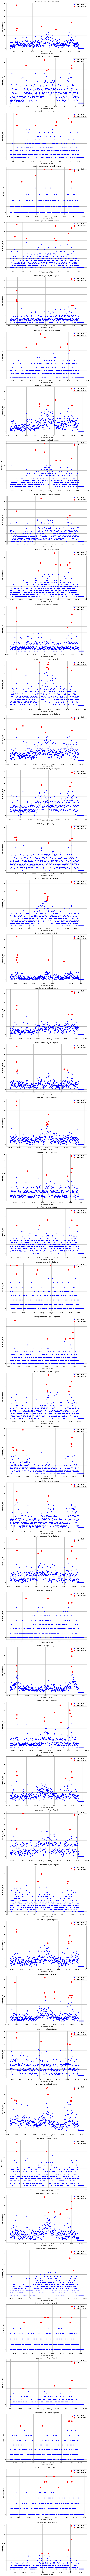

In [43]:
# Aykırı değerleri belirleme ve üst eşiğe eşitleme
threshold_factor = 3  # Standart sapmanın kaç katı olacak
outliers_info = {}

fig, axs = plt.subplots(len(merged_df['ilce'].unique()), 1, figsize=(10, 6 * len(merged_df['ilce'].unique())))

for i, ilce in enumerate(merged_df['ilce'].unique()):
    ilce_data = merged_df[merged_df['ilce'] == ilce]
    std_dev = ilce_data['bildirimsiz_sum'].std()
    upper_limit = ilce_data['bildirimsiz_sum'].mean() + threshold_factor * std_dev
    outliers = ilce_data[ilce_data['bildirimsiz_sum'] > upper_limit]
    outliers_count = len(outliers)
    outliers_info[ilce] = outliers_count

    # Aykırı değerleri yeni eşiğe eşitleme
    merged_df.loc[outliers.index, 'bildirimsiz_sum'] = upper_limit

    axs[i].plot(ilce_data.index, ilce_data['bildirimsiz_sum'], marker='o', linestyle='', label='Veri Noktaları', color='blue')
    axs[i].plot(outliers.index, outliers['bildirimsiz_sum'], marker='o', markersize=10, linestyle='', label='Aykırı Değerler', color='red')
    axs[i].set_title(f"{ilce} - Aykırı Değerler")
    axs[i].set_xlabel('Veri Noktası İndeksi')
    axs[i].set_ylabel('bildirimsiz_sum')
    axs[i].legend()
    axs[i].grid(True)

# Her ilçede kaç adet aykırı değer tespit edildiğini yazdırma
print("İlçe Aykırı Değer Bilgileri:")
for ilce, count in outliers_info.items():
    print(f"{ilce}: {count} adet aykırı değer tespit edildi.")

plt.tight_layout()
plt.show()

# Buraya verileri belki son 1 yıl olarak filtreleyecek kodu yaz.
> ### Buraya yazmıyorum ki filtreleme düzgün gerçekleşsin

# Elastic.net tahmini:

In [44]:
merged_df

,ilce,tarih,bildirimsiz_sum,bildirimli_sum,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
730,manisa-akhisar,2023-01-01,0.0,3.0,38.9177,27.8366,4.693333,1.320000,0.0,89.620000,...,13.222222,0,1,0,0,0,0,0,0,1
731,manisa-akhisar,2023-01-02,4.0,1.0,38.9177,27.8366,3.753333,0.986667,0.0,80.320000,...,11.933333,1,0,1,0,0,0,0,0,0
732,manisa-akhisar,2023-01-03,4.0,1.0,38.9177,27.8366,2.020000,0.000000,0.0,73.860000,...,10.588889,1,0,0,1,0,0,0,0,0
733,manisa-akhisar,2023-01-04,3.0,1.0,38.9177,27.8366,1.886667,17.560000,0.0,74.766667,...,10.355556,1,0,0,0,1,0,0,0,0
734,manisa-akhisar,2023-01-05,9.0,1.0,38.9177,27.8366,3.520000,22.433333,0.0,90.826667,...,11.000000,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,izmir-selcuk,2024-01-27,0.0,0.0,37.9508,27.3700,5.392857,34.685714,0.0,84.142857,...,12.890000,0,1,0,0,0,0,0,1,0
52918,izmir-selcuk,2024-01-28,0.0,0.0,37.9508,27.3700,5.364286,20.392857,0.0,79.535714,...,11.830000,0,1,0,0,0,0,0,0,1
52919,izmir-selcuk,2024-01-29,0.0,0.0,37.9508,27.3700,3.971429,41.014286,0.0,75.442857,...,7.430000,1,0,1,0,0,0,0,0,0
52920,izmir-selcuk,2024-01-30,0.0,0.0,37.9508,27.3700,4.578571,43.650000,0.0,67.757143,...,6.380000,1,0,0,1,0,0,0,0,0


In [45]:
merged_df.columns

Index(['ilce', 'tarih', 'bildirimsiz_sum', 'bildirimli_sum', 'gece_lat',
       'gece_lon', 'gece_t_2m:C', 'gece_effective_cloud_cover:p',
       'gece_global_rad:W', 'gece_relative_humidity_2m:p',
       'gece_wind_dir_10m:d', 'gece_wind_speed_10m:ms',
       'gece_prob_precip_1h:p', 'gece_t_apparent:C', 'gündüz_lat',
       'gündüz_lon', 'gündüz_t_2m:C', 'gündüz_effective_cloud_cover:p',
       'gündüz_global_rad:W', 'gündüz_relative_humidity_2m:p',
       'gündüz_wind_dir_10m:d', 'gündüz_wind_speed_10m:ms',
       'gündüz_prob_precip_1h:p', 'gündüz_t_apparent:C', 'hafta_ici',
       'hafta_sonu', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday'],
      dtype='object')

# Şimdi de her bir ilçenin (- ya da + farketmez) en fazla korelasyona sahip olduğu 4 sütunu tespit edecek kodu yazalım

In [46]:
korelasyon_hesaplama = merged_df

from sklearn.linear_model import LinearRegression

# Her bir ilçe için en yüksek korelasyona sahip 4 sütunu seçme
ilce_korelasyonları = {}

for ilce in korelasyon_hesaplama['ilce'].unique():
    ilce_data = korelasyon_hesaplama[korelasyon_hesaplama['ilce'] == ilce]
    ilce_data = ilce_data.drop(columns=['ilce', 'tarih', 'bildirimli_sum', 'gece_lat','gündüz_lat','gece_lon','gündüz_lon','gece_t_apparent:C',"gündüz_t_apparent:C"])  # Diğer sütunları dışarıda bırakma
    ilce_data = ilce_data.select_dtypes(include=['number'])  # Sayısal sütunları seçme
    correlations = ilce_data.corr()['bildirimsiz_sum'].abs().sort_values(ascending=False)
    top_4_features = correlations[1:5].index.tolist()  # "bildirimsiz_sum" sütununu dışarıda bırakıyoruz
    ilce_korelasyonları[ilce] = top_4_features

# Her bir ilçenin en yüksek korelasyona sahip 4 sütununu yazdırma
print("İlçe Bazlı En Yüksek Korelasyona Sahip 4 Sütun:")
for ilce, features in ilce_korelasyonları.items():
    print(f"{ilce}: {features}")

İlçe Bazlı En Yüksek Korelasyona Sahip 4 Sütun:
manisa-akhisar: ['gece_t_2m:C', 'gündüz_t_2m:C', 'gece_wind_dir_10m:d', 'gündüz_prob_precip_1h:p']
manisa-alasehir: ['gece_t_2m:C', 'gündüz_t_2m:C', 'gece_wind_speed_10m:ms', 'gündüz_wind_speed_10m:ms']
manisa-demirci: ['gece_t_2m:C', 'gündüz_t_2m:C', 'gece_prob_precip_1h:p', 'gündüz_prob_precip_1h:p']
manisa-golmarmara: ['gece_t_2m:C', 'gündüz_t_2m:C', 'gündüz_prob_precip_1h:p', 'gece_prob_precip_1h:p']
manisa-gordes: ['gece_prob_precip_1h:p', 'gündüz_wind_speed_10m:ms', 'gece_t_2m:C', 'gündüz_prob_precip_1h:p']
manisa-kirkagac: ['gece_effective_cloud_cover:p', 'gündüz_prob_precip_1h:p', 'gündüz_effective_cloud_cover:p', 'gece_wind_speed_10m:ms']
manisa-koprubasi: ['gece_t_2m:C', 'gündüz_t_2m:C', 'gündüz_wind_dir_10m:d', 'gece_wind_dir_10m:d']
manisa-salihli: ['gece_t_2m:C', 'gündüz_t_2m:C', 'gündüz_wind_speed_10m:ms', 'gündüz_relative_humidity_2m:p']
manisa-sarigol: ['gece_t_2m:C', 'gündüz_t_2m:C', 'gece_relative_humidity_2m:p', 'gündüz

# MARK 1

In [47]:
"""from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2023-12-03'
end_date = '2024-01-03'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler (tüm sütunlar)
    features = ilce_train_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum'])
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Modeli eğitme (ElasticNet regresyonu)
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # İstediğiniz alpha ve l1_ratio değerlerini belirtin
    model.fit(features, target)
    
    # Tahminde bulunma
    ilce_predictions = model.predict(ilce_test_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum']))
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions
"""

"from sklearn.linear_model import ElasticNet\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.linear_model import LinearRegression\n\n# Tahmin edilecek tarih aralığı\nstart_date = '2023-12-03'\nend_date = '2024-01-03'\n\n# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma\ntrain_data = merged_df[merged_df['tarih'] < start_date]\n\n# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma\ntest_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]\n\n# Tahminde bulunacak ilçelerin listesi\nilceler = merged_df['ilce'].unique()\n\n# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım\npredictions = {}\n\n# Her bir ilçe için tahminde bulunma\nfor ilce in ilceler:\n    ilce_train_data = train_data[train_data['ilce'] == ilce]\n    ilce_test_data = test_data[test_data['ilce'] == ilce]\n    \n    # Tahminde kullanılacak özellikler (tüm sütunlar)\n    features = ilce_train_data.drop(col

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2023-12-03'
end_date = '2024-01-03'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler
    features = ilce_train_data[ilce_korelasyonları[ilce]]
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Polinomsal özellikler oluşturma
    polynomial_features = PolynomialFeatures(degree=2)
    features_poly = polynomial_features.fit_transform(features)
    
    # Modeli eğitme
    model = LinearRegression()
    model.fit(features_poly, target)
    
    # Tahminde bulunma
    test_features = ilce_test_data[ilce_korelasyonları[ilce]]
    test_features_poly = polynomial_features.transform(test_features)
    ilce_predictions = model.predict(test_features_poly)
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions

# Grid Search önemli

In [49]:
"""##### GRID SEARCH


from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Grid Search için alpha ve l1_ratio değerlerinin aday listelerini tanımla
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# ElasticNet regresyon modelini tanımla
elastic_net = ElasticNet()

# MAE skorlama fonksiyonunu tanımla
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# TimeSeriesSplit kullanarak çapraz doğrulama stratejisi tanımla
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search modelini tanımla
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=tscv, scoring=mae_scorer, verbose=1, n_jobs=-1)

# Grid Search'i eğitim verisi üzerinde uygula
grid_search.fit(features, target)

# En iyi parametreleri ve skoru görüntüle
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor (MAE):", -grid_search.best_score_)
"""

'##### GRID SEARCH\n\n\nfrom sklearn.metrics import make_scorer, mean_absolute_error\nfrom sklearn.model_selection import GridSearchCV, TimeSeriesSplit\n\n# Grid Search için alpha ve l1_ratio değerlerinin aday listelerini tanımla\nparam_grid = {\'alpha\': [0.01, 0.1, 1.0, 10.0],\n              \'l1_ratio\': [0.1, 0.3, 0.5, 0.7, 0.9]}\n\n# ElasticNet regresyon modelini tanımla\nelastic_net = ElasticNet()\n\n# MAE skorlama fonksiyonunu tanımla\nmae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)\n\n# TimeSeriesSplit kullanarak çapraz doğrulama stratejisi tanımla\ntscv = TimeSeriesSplit(n_splits=5)\n\n# Grid Search modelini tanımla\ngrid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=tscv, scoring=mae_scorer, verbose=1, n_jobs=-1)\n\n# Grid Search\'i eğitim verisi üzerinde uygula\ngrid_search.fit(features, target)\n\n# En iyi parametreleri ve skoru görüntüle\nprint("En iyi parametreler:", grid_search.best_params_)\nprint("En iyi skor (MAE):", -gr

# Bir sonrakinde Her bir ilçe için kendi alpha l1 değerlerini bulacak kodu yaz. Manisa akhisar 0,7 MAE çıkarken neden diğerlerinin kahrını çeksin?

In [50]:
len(predictions)

47

In [51]:
from sklearn.metrics import mean_absolute_error

# MAE skorlarını depolamak için bir sözlük oluşturalım
mae_scores = {}

# Her bir ilçe için MAE skorunu hesaplayalım
for ilce, ilce_predictions in predictions.items():
    true_values = test_data[test_data['ilce'] == ilce]['bildirimsiz_sum'].values
    mae = mean_absolute_error(true_values, ilce_predictions)
    mae_scores[ilce] = mae

# Her ilçenin MAE skorunu yazdıralım
print("İlçe Bazlı MAE Skorları:")
for ilce, mae in mae_scores.items():
    print(f"{ilce}: {mae}")

İlçe Bazlı MAE Skorları:
manisa-akhisar: 3.256423661763899
manisa-alasehir: 2.638190078325195
manisa-demirci: 1.5099766198571187
manisa-golmarmara: 0.8954995932015153
manisa-gordes: 1.5829550214459869
manisa-kirkagac: 1.8072578861567963
manisa-koprubasi: 1.071596223798665
manisa-salihli: 3.599316739974272
manisa-sarigol: 1.3780482738937216
manisa-saruhanli: 1.9215887806854015
manisa-selendi: 1.6194805868346358
manisa-soma: 2.1567395037281107
manisa-turgutlu: 1.9378127619766263
manisa-yunusemre: 3.1778569445821487
manisa-sehzadeler: 3.388248113213413
izmir-aliaga: 2.3085832736004748
izmir-bayindir: 1.6161276204658095
izmir-bayrakli: 1.7711615238235567
izmir-bergama: 3.8466463086267826
izmir-bornova: 4.029714023910109
izmir-buca: 3.391074463753229
izmir-dikili: 2.6565307994568803
izmir-foca: 3.0203094910445163
izmir-gaziemir: 1.6150612076047803
izmir-guzelbahce: 1.403599297283379
izmir-karabaglar: 2.3444925890961863
izmir-karaburun: 2.3913683123109717
izmir-karsiyaka: 3.85605046682577
iz

In [52]:
# Tüm MAE skorlarının ortalamasını hesaplayalım
overall_mae = sum(mae_scores.values()) / len(mae_scores)

# Ortalama MAE skorunu yazdıralım
print("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)

Tüm İlçelerin Ortalama MAE Skoru: 2.5295083707039487


In [53]:
print("Tüm sütunları kullanarak elastik.net MAE:", 2.6268238454349233)
print("alpha=0.1, l1_ratio=0.5")
print("-------------------------------------------------------------")
print("Tüm sütunları kullanarak elastik.net MAE:", 2.6642321123684143)
print("alpha=1.0, l1_ratio=0.3")
print("-------------------------------------------------------------")

Tüm sütunları kullanarak elastik.net MAE: 2.6268238454349233
alpha=0.1, l1_ratio=0.5
-------------------------------------------------------------
Tüm sütunları kullanarak elastik.net MAE: 2.6642321123684143
alpha=1.0, l1_ratio=0.3
-------------------------------------------------------------


# model önemi

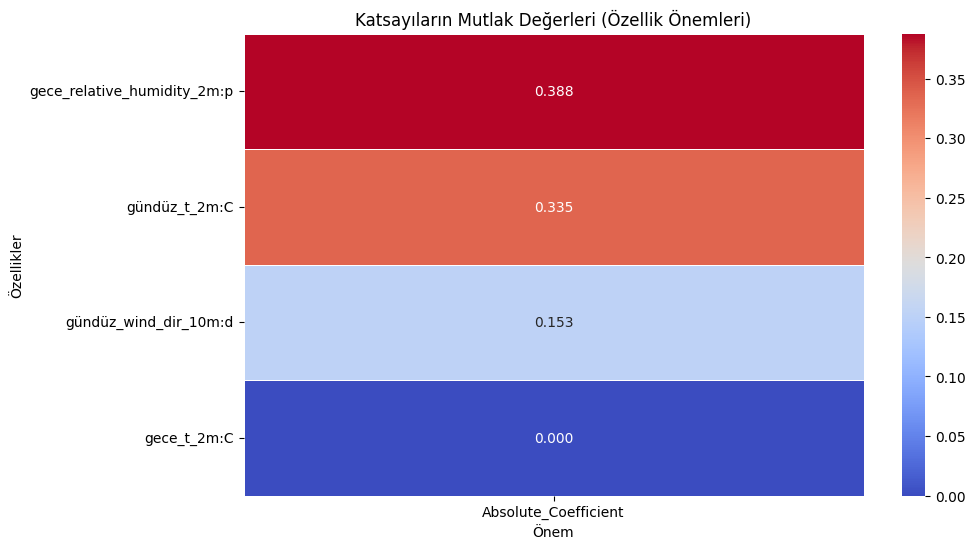

In [54]:
# Model katsayılarını al
coefficients = model.coef_

# Özellik isimlerini al
feature_names = features.columns

# Katsayıları ve özellik isimlerini eşleştir
coefficients_dict = dict(zip(feature_names, coefficients))

# Katsayıları DataFrame'e dönüştür
coefficients_df = pd.DataFrame(list(coefficients_dict.items()), columns=['Feature', 'Coefficient'])

# Katsayıları mutlak değerlerine göre sırala
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Önem değerlerini ısı haritası olarak çiz
plt.figure(figsize=(10, 6))
sns.heatmap(coefficients_df.set_index('Feature')[['Absolute_Coefficient']], cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.title('Katsayıların Mutlak Değerleri (Özellik Önemleri)')
plt.xlabel('Önem')
plt.ylabel('Özellikler')
plt.show()

# Gerçektahmin

In [55]:
"""import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Tahmin edilecek tarih aralığı
start_date = '2024-01-04'
end_date = '2024-01-31'

# Veri setini yükle
# merged_df = pd.read_csv('veri_seti.csv') # Veri setinin dosya yolu varsa

# Veri setini işle
merged_df['tarih'] = pd.to_datetime(merged_df['tarih'])

# Her ilçe için ayrı ayrı tahmin yapmak için ilçeleri al
ilceler = merged_df['ilce'].unique()

# Her bir ilçe için tahminleri depolamak için bir sözlük oluştur
tahmin_sonuclari = {}

for ilce in ilceler:
    # Belirli bir ilçe için veriyi filtrele
    filtered_df = merged_df[merged_df['ilce'] == ilce]
    
    # Eğitim setini oluştur (start_date'den önceki veriler)
    X_train = filtered_df[filtered_df['tarih'] < start_date].drop(columns=['bildirimsiz_sum', 'ilce', 'tarih'])
    y_train = filtered_df[filtered_df['tarih'] < start_date]['bildirimsiz_sum']
    
    # Test setini oluştur (start_date ve end_date arasındaki veriler)
    X_test = filtered_df[(filtered_df['tarih'] >= start_date) & (filtered_df['tarih'] <= end_date)].drop(columns=['bildirimsiz_sum', 'ilce', 'tarih'])
    y_test = filtered_df[(filtered_df['tarih'] >= start_date) & (filtered_df['tarih'] <= end_date)]['bildirimsiz_sum']
    
    # XGBoost modelini oluştur
    model = XGBRegressor()
    
    # Modeli eğit
    model.fit(X_train, y_train)
    
    # Tahminleri yap
    prediction = model.predict(X_test)
    
    # Mean Absolute Error'ı hesapla
    mae = mean_absolute_error(y_test, prediction)
    
    # Tahmin sonuçlarını sözlüğe ekle
    tahmin_sonuclari[ilce] = mae

# Tahmin sonuçlarını görüntüle
tahmin_sonuclari"""

"import pandas as pd\nfrom xgboost import XGBRegressor\nfrom sklearn.metrics import mean_absolute_error\n\n# Tahmin edilecek tarih aralığı\nstart_date = '2024-01-04'\nend_date = '2024-01-31'\n\n# Veri setini yükle\n# merged_df = pd.read_csv('veri_seti.csv') # Veri setinin dosya yolu varsa\n\n# Veri setini işle\nmerged_df['tarih'] = pd.to_datetime(merged_df['tarih'])\n\n# Her ilçe için ayrı ayrı tahmin yapmak için ilçeleri al\nilceler = merged_df['ilce'].unique()\n\n# Her bir ilçe için tahminleri depolamak için bir sözlük oluştur\ntahmin_sonuclari = {}\n\nfor ilce in ilceler:\n    # Belirli bir ilçe için veriyi filtrele\n    filtered_df = merged_df[merged_df['ilce'] == ilce]\n    \n    # Eğitim setini oluştur (start_date'den önceki veriler)\n    X_train = filtered_df[filtered_df['tarih'] < start_date].drop(columns=['bildirimsiz_sum', 'ilce', 'tarih'])\n    y_train = filtered_df[filtered_df['tarih'] < start_date]['bildirimsiz_sum']\n    \n    # Test setini oluştur (start_date ve end_date

In [56]:
"""len(tahmin_sonuclari)"""

'len(tahmin_sonuclari)'

In [57]:
"""mae_values = list(tahmin_sonuclari.values())
overall_mae = sum(mae_values) / len(mae_values)
print("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)"""

'mae_values = list(tahmin_sonuclari.values())\noverall_mae = sum(mae_values) / len(mae_values)\nprint("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)'

# kaydedelim

# MARK 2

In [58]:
"""from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2024-01-04'
end_date = '2024-01-31'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler (tüm sütunlar)
    features = ilce_train_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum'])
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Modeli eğitme (ElasticNet regresyonu)
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # İstediğiniz alpha ve l1_ratio değerlerini belirtin
    model.fit(features, target)
    
    # Tahminde bulunma
    ilce_predictions = model.predict(ilce_test_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum']))
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions
"""

"from sklearn.linear_model import ElasticNet\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.linear_model import LinearRegression\n\n# Tahmin edilecek tarih aralığı\nstart_date = '2024-01-04'\nend_date = '2024-01-31'\n\n# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma\ntrain_data = merged_df[merged_df['tarih'] < start_date]\n\n# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma\ntest_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]\n\n# Tahminde bulunacak ilçelerin listesi\nilceler = merged_df['ilce'].unique()\n\n# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım\npredictions = {}\n\n# Her bir ilçe için tahminde bulunma\nfor ilce in ilceler:\n    ilce_train_data = train_data[train_data['ilce'] == ilce]\n    ilce_test_data = test_data[test_data['ilce'] == ilce]\n    \n    # Tahminde kullanılacak özellikler (tüm sütunlar)\n    features = ilce_train_data.drop(col

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2024-01-04'
end_date = '2024-01-31'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler
    features = ilce_train_data[ilce_korelasyonları[ilce]]
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Polinomsal özellikler oluşturma
    polynomial_features = PolynomialFeatures(degree=2)
    features_poly = polynomial_features.fit_transform(features)
    
    # Modeli eğitme
    model = LinearRegression()
    model.fit(features_poly, target)
    
    # Tahminde bulunma
    test_features = ilce_test_data[ilce_korelasyonları[ilce]]
    test_features_poly = polynomial_features.transform(test_features)
    ilce_predictions = model.predict(test_features_poly)
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions

In [60]:
len(predictions)

47

In [61]:
from sklearn.metrics import mean_absolute_error

# MAE skorlarını depolamak için bir sözlük oluşturalım
mae_scores = {}

# Her bir ilçe için MAE skorunu hesaplayalım
for ilce, ilce_predictions in predictions.items():
    true_values = test_data[test_data['ilce'] == ilce]['bildirimsiz_sum'].values
    mae = mean_absolute_error(true_values, ilce_predictions)
    mae_scores[ilce] = mae

# Her ilçenin MAE skorunu yazdıralım
print("İlçe Bazlı MAE Skorları:")
for ilce, mae in mae_scores.items():
    print(f"{ilce}: {mae}")

İlçe Bazlı MAE Skorları:
manisa-akhisar: 7.849798809572822
manisa-alasehir: 6.068558598418131
manisa-demirci: 1.9296224449585775
manisa-golmarmara: 0.7684097229910272
manisa-gordes: 3.591782208354108
manisa-kirkagac: 3.086634578739239
manisa-koprubasi: 0.903046945589976
manisa-salihli: 7.484381098873947
manisa-sarigol: 2.159072914643366
manisa-saruhanli: 3.80841248874022
manisa-selendi: 2.0246331014178454
manisa-soma: 3.37177790853012
manisa-turgutlu: 6.057576854871039
manisa-yunusemre: 8.315901299838442
manisa-sehzadeler: 6.093141435971781
izmir-aliaga: 6.328706890553221
izmir-bayindir: 3.810987047218467
izmir-bayrakli: 4.035802264886438
izmir-bergama: 7.988416285014039
izmir-bornova: 11.30766592054684
izmir-buca: 7.696111644675942
izmir-dikili: 6.0776584231032205
izmir-foca: 4.951847668901969
izmir-gaziemir: 1.7767857142857142
izmir-guzelbahce: 1.932652487324836
izmir-karabaglar: 5.552969813065981
izmir-karaburun: 5.48972573868086
izmir-karsiyaka: 6.663107162265406
izmir-kemalpasa: 6

In [62]:
# Tüm MAE skorlarının ortalamasını hesaplayalım
overall_mae = sum(mae_scores.values()) / len(mae_scores)

# Ortalama MAE skorunu yazdıralım
print("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)

Tüm İlçelerin Ortalama MAE Skoru: 5.302329385954568


In [63]:
print("Tüm sütunları kullanarak elastik.net MAE:", 2.6268238454349233)
print("alpha=0.1, l1_ratio=0.5")
print("-------------------------------------------------------------")
print("Tüm sütunları kullanarak elastik.net MAE:", 2.6642321123684143)
print("alpha=1.0, l1_ratio=0.3")
print("-------------------------------------------------------------")

Tüm sütunları kullanarak elastik.net MAE: 2.6268238454349233
alpha=0.1, l1_ratio=0.5
-------------------------------------------------------------
Tüm sütunları kullanarak elastik.net MAE: 2.6642321123684143
alpha=1.0, l1_ratio=0.3
-------------------------------------------------------------


In [64]:
# Tahminlerin depolanacağı DataFrame'i oluşturalım
tahminler_df = pd.DataFrame(columns=['Tarih', 'İlçe', 'Tahmin'])

# Her bir unique ilçe için tahmin skorlarını sırayla ekleyelim
for ilce, ilce_predictions in predictions.items():
    # Tahminlerin başlangıç tarihi
    start_date = pd.Timestamp('2024-01-04')
    
    # Tahmin skorlarını sırayla DataFrame'e ekleyelim
    for prediction in ilce_predictions:
        tahminler_df = pd.concat([tahminler_df, pd.DataFrame({'Tarih': [start_date], 'İlçe': [ilce], 'Tahmin': [prediction]})], ignore_index=True)
        start_date += pd.Timedelta(days=1)

/tmp/ipykernel_18/471440587.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tahminler_df = pd.concat([tahminler_df, pd.DataFrame({'Tarih': [start_date], 'İlçe': [ilce], 'Tahmin': [prediction]})], ignore_index=True)


In [65]:
tahminler_df['unique_id'] = tahminler_df['Tarih'].astype(str) + '-' + tahminler_df['İlçe']
tahminler_df = tahminler_df.rename(columns={'Tahmin': 'bildirimsiz_sum'})

In [66]:
tahminler_df = tahminler_df.drop(columns=['Tarih','İlçe'])
tahminler_df = tahminler_df[['unique_id', 'bildirimsiz_sum']]

In [67]:
tahminler_df

,unique_id,bildirimsiz_sum
0,2024-01-04-manisa-akhisar,7.022892
1,2024-01-05-manisa-akhisar,5.519912
2,2024-01-06-manisa-akhisar,4.509002
3,2024-01-07-manisa-akhisar,13.462846
4,2024-01-08-manisa-akhisar,9.921154
...,...,...
1311,2024-01-27-izmir-selcuk,1.186101
1312,2024-01-28-izmir-selcuk,0.579257
1313,2024-01-29-izmir-selcuk,0.678654
1314,2024-01-30-izmir-selcuk,0.929324


In [68]:
tahminler_df.to_csv('submission.csv', index=False)

# Şimdi de her bir ilçenin (- ya da + farketmez) en fazla korelasyona sahip olduğu 4 sütunu tespit edecek kodu yazalım

korelasyon_hesaplama = merged_df

ilce_data

from sklearn.linear_model import LinearRegression

# Her bir ilçe için en yüksek korelasyona sahip 4 sütunu seçme
ilce_korelasyonları = {}

for ilce in korelasyon_hesaplama['ilce'].unique():
    ilce_data = korelasyon_hesaplama[korelasyon_hesaplama['ilce'] == ilce]
    ilce_data = ilce_data.drop(columns=['ilce', 'tarih', 'bildirimli_sum', 'gece_lat','gündüz_lat','gece_lon','gündüz_lon','gece_t_apparent:C',"gündüz_t_apparent:C"])  # Diğer sütunları dışarıda bırakma
    ilce_data = ilce_data.select_dtypes(include=['number'])  # Sayısal sütunları seçme
    correlations = ilce_data.corr()['bildirimsiz_sum'].abs().sort_values(ascending=False)
    top_4_features = correlations[1:5].index.tolist()  # "bildirimsiz_sum" sütununu dışarıda bırakıyoruz
    ilce_korelasyonları[ilce] = top_4_features

# Her bir ilçenin en yüksek korelasyona sahip 4 sütununu yazdırma
print("İlçe Bazlı En Yüksek Korelasyona Sahip 4 Sütun:")
for ilce, features in ilce_korelasyonları.items():
    print(f"{ilce}: {features}")

#### ufak bir kontrol:

# 'manisa-akhisar' ilçesine ait verileri filtreleyelim
izmir_menderes = merged_df[merged_df['ilce'] == 'izmir-menderes']

izmir_menderes.drop(columns=['gündüz_lon'], inplace=True)
izmir_menderes.drop(columns=['gündüz_lat'], inplace=True)
izmir_menderes.drop(columns=['ilce'], inplace=True)
izmir_menderes.drop(columns=['gündüz_t_apparent:C'], inplace=True)
izmir_menderes.drop(columns=['tarih'], inplace=True)
#izmir_menderes.drop(columns=['bildirimli_sum'], inplace=True)    -> Bir bakalım bildirimli_sum etkileniyor mu?
izmir_menderes.drop(columns=['gece_lon'], inplace=True)
izmir_menderes.drop(columns=['gece_lat'], inplace=True)
izmir_menderes.drop(columns=['gece_t_apparent:C'], inplace=True)

izmir_menderes_korelasyon = izmir_menderes.corr()
# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(15,5))
sns.heatmap(izmir_menderes_korelasyon, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('izmir_menderes Korelasyon Matrisi')
plt.show()

# 'manisa-akhisar' ilçesine ait verileri filtreleyelim
akhisar_data = merged_df[merged_df['ilce'] == 'manisa-akhisar']

akhisar_data.drop(columns=['gündüz_lon'], inplace=True)
akhisar_data.drop(columns=['gündüz_lat'], inplace=True)
akhisar_data.drop(columns=['ilce'], inplace=True)
akhisar_data.drop(columns=['gündüz_t_apparent:C'], inplace=True)
akhisar_data.drop(columns=['tarih'], inplace=True)
#akhisar_data.drop(columns=['bildirimli_sum'], inplace=True)
akhisar_data.drop(columns=['gece_lon'], inplace=True)
akhisar_data.drop(columns=['gece_lat'], inplace=True)
akhisar_data.drop(columns=['gece_t_apparent:C'], inplace=True)

akhisar_korelasyon = akhisar_data.corr()
# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(15,5))
sns.heatmap(akhisar_korelasyon, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Akhisar Korelasyon Matrisi')
plt.show()

# 'manisa-akhisar' ilçesine ait verileri filtreleyelim
izmir_buca = merged_df[merged_df['ilce'] == 'izmir-buca']


izmir_buca.drop(columns=['gündüz_lon'], inplace=True)
izmir_buca.drop(columns=['gündüz_lat'], inplace=True)
izmir_buca.drop(columns=['ilce'], inplace=True)
izmir_buca.drop(columns=['gündüz_t_apparent:C'], inplace=True)
izmir_buca.drop(columns=['tarih'], inplace=True)
#izmir_buca.drop(columns=['bildirimli_sum'], inplace=True)
izmir_buca.drop(columns=['gece_lon'], inplace=True)
izmir_buca.drop(columns=['gece_lat'], inplace=True)
izmir_buca.drop(columns=['gece_t_apparent:C'], inplace=True)


izmir_buca_korelasyon = izmir_buca.corr()
# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(15,5))
sns.heatmap(izmir_buca_korelasyon, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('izmir_buca Korelasyon Matrisi')
plt.show()

#### neden bu kdar kötü_

# 'manisa-akhisar' ilçesine ait verileri filtreleyelim
manisa_salihli = merged_df[merged_df['ilce'] == 'manisa-salihli']


manisa_salihli.drop(columns=['gündüz_lon'], inplace=True)
manisa_salihli.drop(columns=['gündüz_lat'], inplace=True)
manisa_salihli.drop(columns=['ilce'], inplace=True)
manisa_salihli.drop(columns=['gündüz_t_apparent:C'], inplace=True)
manisa_salihli.drop(columns=['tarih'], inplace=True)
#manisa_salihli.drop(columns=['bildirimli_sum'], inplace=True)
manisa_salihli.drop(columns=['gece_lon'], inplace=True)
manisa_salihli.drop(columns=['gece_lat'], inplace=True)
manisa_salihli.drop(columns=['gece_t_apparent:C'], inplace=True)


manisa_salihli_korelasyon = manisa_salihli.corr()
# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(15,5))
sns.heatmap(manisa_salihli_korelasyon, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('izmir_buca Korelasyon Matrisi')
plt.show()

#### doğru

from sklearn.metrics import mean_absolute_error

def single_regression(df, x_columns, y_column):
    # Tüm bağımsız değişkenleri birleştir
    X = df[x_columns].mean(axis=1)
    
    # Bağımlı değişken
    y = df[y_column]
    
    # Grafik oluştur
    plt.figure(figsize=(10, 6))

    # Regresyon çizgisi çiz
    sns.regplot(x=X, y=y, label='Ortalama X')

    # Eksen etiketleri
    plt.xlabel("Bağımsız Değişkenlerin Ortalaması")
    plt.ylabel("Bağımlı Değişken")
    plt.title(f"{y_column} ile Bağımsız Değişkenlerin Ortalaması Arasındaki Regresyon")

    # MAE hesapla
    mae = mean_absolute_error(y, X)
    print("Mean Absolute Error (MAE):", mae)

    # Göster
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Örnek kullanım
x_columns = ['gündüz_effective_cloud_cover:p', 'gündüz_relative_humidity_2m:p', 'gündüz_t_2m:C', 'gündüz_wind_dir_10m:d']
y_column = 'bildirimsiz_sum'
single_regression(akhisar_data, x_columns, y_column)

# Şimdi de tahminde bulunalım..

"""from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2023-12-03'
end_date = '2024-01-03'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler
    features = ilce_train_data[ilce_korelasyonları[ilce]]
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Polinomsal özellikler oluşturma
    polynomial_features = PolynomialFeatures(degree=2)
    features_poly = polynomial_features.fit_transform(features)
    
    # Modeli eğitme
    model = LinearRegression()
    model.fit(features_poly, target)
    
    # Tahminde bulunma
    test_features = ilce_test_data[ilce_korelasyonları[ilce]]
    test_features_poly = polynomial_features.transform(test_features)
    ilce_predictions = model.predict(test_features_poly)
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions"""

#### tüm sütunları kullanırsak ne olur?

merged_df.columns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2023-12-03'
end_date = '2024-01-03'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler (tüm sütunlar)
    features = ilce_train_data.drop(columns=['ilce', 'tarih', 'bildirimsiz_sum', 'bildirimli_sum'])
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Polinomsal özellikler oluşturma
    polynomial_features = PolynomialFeatures(degree=2)
    features_poly = polynomial_features.fit_transform(features)
    
    # Modeli eğitme
    model = LinearRegression()
    model.fit(features_poly, target)
    
    # Tahminde bulunma
    test_features = ilce_test_data.drop(columns=['ilce', 'tarih', 'bildirimsiz_sum', 'bildirimli_sum'])
    test_features_poly = polynomial_features.transform(test_features)
    ilce_predictions = model.predict(test_features_poly)
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions


len(predictions)

from sklearn.metrics import mean_absolute_error

# MAE skorlarını depolamak için bir sözlük oluşturalım
mae_scores = {}

# Her bir ilçe için MAE skorunu hesaplayalım
for ilce, ilce_predictions in predictions.items():
    true_values = test_data[test_data['ilce'] == ilce]['bildirimsiz_sum'].values
    mae = mean_absolute_error(true_values, ilce_predictions)
    mae_scores[ilce] = mae

# Her ilçenin MAE skorunu yazdıralım
print("İlçe Bazlı MAE Skorları:")
for ilce, mae in mae_scores.items():
    print(f"{ilce}: {mae}")

# Tüm MAE skorlarının ortalamasını hesaplayalım
overall_mae = sum(mae_scores.values()) / len(mae_scores)

# Ortalama MAE skorunu yazdıralım
print("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)

print("Bir evvelki MAE: 2.73738")

# CV skoru: 2.53

# Şimdi gerçek tahminleri yapalım

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2024-01-04'
end_date = '2024-01-31'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler (tüm sütunlar)
    features = ilce_train_data.drop(columns=['ilce', 'tarih', 'bildirimsiz_sum', 'bildirimli_sum'])
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Polinomsal özellikler oluşturma
    polynomial_features = PolynomialFeatures(degree=2)
    features_poly = polynomial_features.fit_transform(features)
    
    # Modeli eğitme
    model = LinearRegression()
    model.fit(features_poly, target)
    
    # Tahminde bulunma
    test_features = ilce_test_data.drop(columns=['ilce', 'tarih', 'bildirimsiz_sum', 'bildirimli_sum'])
    test_features_poly = polynomial_features.transform(test_features)
    ilce_predictions = model.predict(test_features_poly)
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions


len(predictions)

from sklearn.metrics import mean_absolute_error

# MAE skorlarını depolamak için bir sözlük oluşturalım
mae_scores = {}

# Her bir ilçe için MAE skorunu hesaplayalım
for ilce, ilce_predictions in predictions.items():
    true_values = test_data[test_data['ilce'] == ilce]['bildirimsiz_sum'].values
    mae = mean_absolute_error(true_values, ilce_predictions)
    mae_scores[ilce] = mae

# Her ilçenin MAE skorunu yazdıralım
print("İlçe Bazlı MAE Skorları:")
for ilce, mae in mae_scores.items():
    print(f"{ilce}: {mae}")

# Tüm MAE skorlarının ortalamasını hesaplayalım
overall_mae = sum(mae_scores.values()) / len(mae_scores)

# Ortalama MAE skorunu yazdıralım
print("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)

# Kaydedelim

sub

sub.dtypes

# Tahminlerin depolanacağı DataFrame'i oluşturalım
tahminler_df = pd.DataFrame(columns=['Tarih', 'İlçe', 'Tahmin'])

# Her bir unique ilçe için tahmin skorlarını sırayla ekleyelim
for ilce, ilce_predictions in predictions.items():
    # Tahminlerin başlangıç tarihi
    start_date = pd.Timestamp('2024-01-04')
    
    # Tahmin skorlarını sırayla DataFrame'e ekleyelim
    for prediction in ilce_predictions:
        tahminler_df = pd.concat([tahminler_df, pd.DataFrame({'Tarih': [start_date], 'İlçe': [ilce], 'Tahmin': [prediction]})], ignore_index=True)
        start_date += pd.Timedelta(days=1)

tahminler_df['unique_id'] = tahminler_df['Tarih'].astype(str) + '-' + tahminler_df['İlçe']
tahminler_df = tahminler_df.rename(columns={'Tahmin': 'bildirimsiz_sum'})

tahminler_df = tahminler_df.drop(columns=['Tarih','İlçe'])
tahminler_df = tahminler_df[['unique_id', 'bildirimsiz_sum']]

tahminler_df

tahminler_df.to_csv('submission.csv', index=False)

# Bir de unutmadan, en yüksek 4'ü kaldırıp hepsiyle korele şekilde regresyon yaptırsana.